# Data 파악

In [1]:
import pandas as pd
import numpy as np
import random
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_interactions = pd.read_csv('RAW_interactions.csv')

In [3]:
review_rating = raw_interactions[['review', 'rating']]

In [4]:
review_rating.head()

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
1,"So simple, so delicious! Great for chilly fall...",5
2,This worked very well and is EASY. I used not...,4
3,I made the Mexican topping and took it to bunk...,5
4,"Made the cheddar bacon topping, adding a sprin...",5


# review data info

In [5]:
review_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 2 columns):
review    1132198 non-null object
rating    1132367 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.3+ MB


In [6]:
review_rating.isnull().sum()

review    169
rating      0
dtype: int64

# review_rating data have null data in 169 review

In [7]:
review_rating = review_rating[review_rating.review.notnull()]

In [8]:
review_rating.rating.value_counts()

5    816229
4    187333
0     60847
3     40852
2     14122
1     12815
Name: rating, dtype: int64

# review_rating data have 0 in 60847 rating

In [9]:
review_rating = review_rating[review_rating.rating != 0]

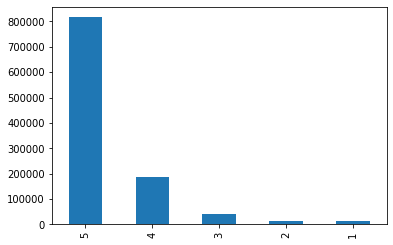

In [10]:
review_rating.rating.value_counts().plot(kind='bar')

In [11]:
temp = review_rating[review_rating.rating == 5]
review_rating = review_rating[review_rating.rating != 5]

In [12]:
len(temp)

816229

In [13]:
rating_4_num = len(review_rating[review_rating.rating == 4])

In [14]:
temp

,review,rating
1,"So simple, so delicious! Great for chilly fall...",5
3,I made the Mexican topping and took it to bunk...,5
4,"Made the cheddar bacon topping, adding a sprin...",5
9,Better than the real!!,5
10,Absolutely AWESOME! I was speechless when I tr...,5
...,...,...
1132359,This is the best and easiest hot fudge ever. I...,5
1132360,Delicious quick thick chocolate sauce with ing...,5
1132363,These were so delicious! My husband and I tru...,5
1132364,WOW! Sometimes I don't take the time to rate ...,5


In [15]:
temp = random.sample(temp.values.tolist(), rating_4_num)

In [16]:
temp = pd.DataFrame(temp, columns=['review', 'rating'])

In [17]:
review_rating = pd.concat([review_rating, temp])

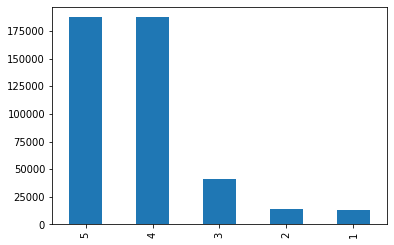

In [18]:
review_rating.rating.value_counts().plot(kind='bar')

In [19]:
review_rating

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
2,This worked very well and is EASY. I used not...,4
5,very very sweet. after i waited the 2 days i b...,4
7,This recipe was OVERLY too sweet. I would sta...,2
8,Very good!,4
...,...,...
187328,I made this and marinated it for 2 nights and ...,5
187329,my mom cooked it most of the winter when we wh...,5
187330,Very Good! I am a lover of shortbread and thi...,5
187331,I didn't think I could improve on my cherry pi...,5


In [20]:
X_data = review_rating['review']
y_data = review_rating['rating']
print('review 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

review 개수: 442455
rating개수: 442455


In [21]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)

In [22]:
normalized_text[:5]

['great with a salad cooked on top of stove for 15 minutes added a shake of cayenne and a pinch of salt used low fat sour cream thanks ',
 'this worked very well and is easy i used not quite a whole package 10oz of white chips great ',
 'very very sweet after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix i m going to add some as a cake filling today and will take a photo ',
 'this recipe was overly too sweet i would start out with 1 3 or 1 4 cup of sugar and jsut add on from there just 2 cups was way too much and i had to go back to the grocery store to buy more raspberries because it made so much mix overall i would but the long narrow box or raspberries its a perfect fit for the recipe plus a little extra i was not impressed with this recipe it was exceptionally over sweet if you make this simple recipe make sure to add less sugar ',
 'very good ']

In [31]:
review = []
review = [word_tokenize(sentence) for sentence in normalized_text]

In [23]:
t = Tokenizer()
t.fit_on_texts(normalized_text)
X_encoded = t.texts_to_sequences(normalized_text)
vocab_size = len(t.word_index) + 1

print(X_encoded[:3])

[[30, 13, 4, 179, 135, 27, 157, 9, 816, 8, 491, 114, 42, 4, 1842, 9, 575, 3, 4, 931, 9, 136, 20, 271, 237, 304, 106, 26], [7, 281, 22, 89, 3, 16, 44, 1, 20, 29, 193, 4, 176, 1061, 5392, 9, 263, 331, 30], [22, 22, 110, 126, 1, 2409, 2, 60, 716, 1, 599, 60, 50, 3468, 9, 1605, 3, 42, 40, 6, 2, 187, 1, 108, 266, 6, 68, 45, 24, 4, 141, 273, 461, 3, 34, 382, 4, 753]]


In [24]:
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

353964
88491


리뷰의 최대 길이 : 6972
리뷰의 평균 길이 : 284.404120


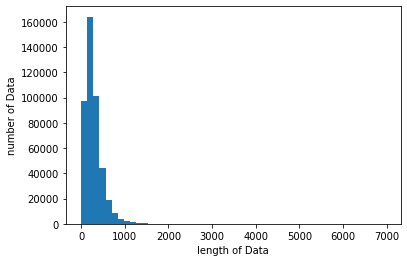

In [25]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in X_data))
print('리뷰의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [26]:
max_len = 1308
data = pad_sequences(X_encoded, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (442455, 1308)


In [27]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train]) 

In [28]:
print(X_train[:3])
print(y_train[:3])

[[  0   0   0 ... 304 106  26]
 [  0   0   0 ... 263 331  30]
 [  0   0   0 ... 382   4 753]]
[4 4 4]


# FastText 훈련 및 모델 저장

In [32]:
from gensim.models import FastText
ft_model = FastText(review, size=100, window=5, min_count=5, workers=4, sg=1) 

In [39]:
ft_model_result = ft_model.wv.most_similar("recipe")
print(ft_model_result)

[('receipe', 0.8993399143218994), ('recipee', 0.8842623829841614), ('recip', 0.8825324773788452), ('recipy', 0.8671647310256958), ('recipt', 0.8632622957229614), ('reciipe', 0.8542947769165039), ('recipie', 0.8433014750480652), ('therecipe', 0.8381420969963074), ('reciped', 0.8056797981262207), ('reciepe', 0.7850182056427002)]


In [40]:
ft_model.save("eng_ft")

In [56]:
ft_model = FastText.load("eng_ft")

# FastText 사용

In [52]:
embedding_matrix = np.zeros((vocab_size, 100))
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(86596, 100)

In [50]:
def get_vector(word):
    if word in ft_model:
        return ft_model[word]
    else:
        return None

In [53]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 100개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)

In [65]:
model.add(e)
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size = 64, validation_split = 0.2, verbose = 1)

Train on 283171 samples, validate on 70793 samples
Epoch 1/10


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000020AFE44F948>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\weakref.py", line 359, in remove
    self = selfref()
KeyboardInterrupt: 


283171/283171 [==============================] - 378s 1ms/sample - loss: 1.1884 - acc: 0.6614 - val_loss: 2.3446 - val_acc: 0.0000e+00
Epoch 2/10
283171/283171 [==============================] - 337s 1ms/sample - loss: 1.0765 - acc: 0.6616 - val_loss: 2.3047 - val_acc: 0.0000e+00
Epoch 3/10
283171/283171 [==============================] - 349s 1ms/sample - loss: 1.0722 - acc: 0.6616 - val_loss: 2.3354 - val_acc: 0.0000e+00
Epoch 4/10
283171/283171 [==============================] - 360s 1ms/sample - loss: 1.0715 - acc: 0.6616 - val_loss: 2.3148 - val_acc: 0.0000e+00
Epoch 5/10
 92160/283171 [========>.....................] - ETA: 3:18 - loss: 1.0682 - acc: 0.6629

KeyboardInterrupt: 

In [59]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable